# EDA - Analisis Exploratorio de Datos
## Author: Ronald Barberi (KretoN)
[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1pI5QQ0XCS7SvKlp8KHwPKR0CsRizS211?usp=sharing&copy)

### Objetivo
Realizar un analisis de la información y en base a las métricas hayadas, construir un dataset con el cual se entrenará un modelo predictivo de clasifiación binaria.

Modelo generado con el DataSet entregado: [mdl_rdm_frt_clientes_propensos_venta](https://github.com/RonaldBarberi/data_science/blob/main/projects/mdl_rdm_frt_clientes_propensos_venta/src/ml_rdm_frt_clients_sale.ipynb)

Nota: El DataSet original fue generado a traves de random, por lo cual el ejercicio es irreal, pero aplicando conceptos reales.

### Importamos las librerias a utilizar.

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

### Declaramos variables globales.

In [2]:
main_dic = os.getcwd()
dic_args = {
    'path_data_inp': os.path.join(main_dic, '..', 'data', 'dataset_clientes_venta.zip'),
    'path_data_out': os.path.join(main_dic, '..', 'data', 'dataset_clear_model.csv'),
}

### Ajustamos configuraciones visuales para los DataFrame con Pandas

In [3]:
pd.set_option('display.max_rows', None) # mostrar todas las filas
pd.set_option('display.max_columns', None) # mostrar todas las columnas
pd.set_option('display.width', 1_000) # ancho máximo de línea
pd.set_option('display.colheader_justify', 'center')  # centrar nombres de columnas

### Generamos nuestro DF en base al Dataset, configurando el tipo de dato de cada variable para un mejor rendimiento.

In [4]:
schema_data = {
    'numero': 'int64',
    'operador': 'category',
    'ciudad': 'category',
    'departamento': 'category',
    'region': 'category',
    'estrato': 'int8',
    'rango_recarga': 'category',
    'equipo': 'category',
    'nombre_base': 'category',
    'anho_mes': object,
    'll_predictivo': 'int8',
    'll_blaster': 'int8',
    'll_ivr': 'int8',
    'sms': 'int8',
    'venta': 'category',
    'canal_venta': 'category',
    'fecha_contacto': object,
    'tiempo_llamada': 'int16',
    'edad_cliente': 'int16',
    'genero': 'category',
    'tipo_plan': 'category',
    'resultado_llamada': 'category',
    'score_cliente': 'int64',
}

df = pd.read_csv(dic_args['path_data_inp'],  compression='zip', sep='|', dtype=schema_data)
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   numero             500000 non-null  int64   
 1   operador           500000 non-null  category
 2   ciudad             500000 non-null  category
 3   departamento       500000 non-null  category
 4   region             500000 non-null  category
 5   estrato            500000 non-null  int8    
 6   rango_recarga      500000 non-null  category
 7   equipo             500000 non-null  category
 8   nombre_base        500000 non-null  category
 9   anho_mes           500000 non-null  object  
 10  ll_predictivo      500000 non-null  int8    
 11  ll_blaster         500000 non-null  int8    
 12  ll_ivr             500000 non-null  int8    
 13  sms                500000 non-null  int8    
 14  venta              500000 non-null  category
 15  canal_venta        500000 non-null

,numero,operador,ciudad,departamento,region,estrato,rango_recarga,equipo,nombre_base,anho_mes,ll_predictivo,ll_blaster,ll_ivr,sms,venta,canal_venta,fecha_contacto,tiempo_llamada,edad_cliente,genero,tipo_plan,resultado_llamada,score_cliente
0,3774622596,ETB,Bogota,Valle del Cauca,Caribe,4,200-500,Huawei,Campaña D,2024-11,7,7,1,2,si,blaster,2024-04-07,572,58,Femenino,Postpago,Conectado,579
1,3359723869,Tigo,Cartagena,Cundinamarca,Caribe,3,20-50,Nokia,Campaña B,2025-11,2,16,1,1,no,ivr,2024-06-11,534,26,Masculino,Prepago,Conectado,799
2,3670875680,Avantel,Pereira,Risaralda,Caribe,3,50-100,Samsung Galaxy,Campaña E,2024-04,4,3,2,2,no,predictivo,2024-09-15,590,66,Masculino,Postpago,Conectado,801
3,3953248928,Movistar,Pereira,Antioquia,Caribe,2,50-100,iPhone,Campaña E,2023-03,8,8,2,1,no,blaster,2024-02-17,507,70,Masculino,Prepago,Fallo,709
4,3327467758,ETB,Bogota,Valle del Cauca,Caribe,6,50-100,iPhone,Campaña E,2023-06,8,13,2,2,no,predictivo,2024-05-08,269,52,Masculino,Postpago,Ocupado,786


### Eliminación de columnas innecesarias
Se eliminan las columna sin relevancia para la predicción ya que son valores individuale por cliente y no nos proporcionará información para predecir.

In [5]:
df = df.drop(columns=[
    'numero','anho_mes','fecha_contacto','departamento','region','nombre_base','canal_venta','resultado_llamada'
])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   operador        500000 non-null  category
 1   ciudad          500000 non-null  category
 2   estrato         500000 non-null  int8    
 3   rango_recarga   500000 non-null  category
 4   equipo          500000 non-null  category
 5   ll_predictivo   500000 non-null  int8    
 6   ll_blaster      500000 non-null  int8    
 7   ll_ivr          500000 non-null  int8    
 8   sms             500000 non-null  int8    
 9   venta           500000 non-null  category
 10  tiempo_llamada  500000 non-null  int16   
 11  edad_cliente    500000 non-null  int16   
 12  genero          500000 non-null  category
 13  tipo_plan       500000 non-null  category
 14  score_cliente   500000 non-null  int64   
dtypes: category(7), int16(2), int64(1), int8(5)
memory usage: 11.4 MB


### Transformamos a binario nuestra columna objetivo

In [6]:
df['venta'] = df['venta'].apply(lambda x: 1 if x == 'si' else 0).astype('int8')

df.head(5)

,operador,ciudad,estrato,rango_recarga,equipo,ll_predictivo,ll_blaster,ll_ivr,sms,venta,tiempo_llamada,edad_cliente,genero,tipo_plan,score_cliente
0,ETB,Bogota,4,200-500,Huawei,7,7,1,2,1,572,58,Femenino,Postpago,579
1,Tigo,Cartagena,3,20-50,Nokia,2,16,1,1,0,534,26,Masculino,Prepago,799
2,Avantel,Pereira,3,50-100,Samsung Galaxy,4,3,2,2,0,590,66,Masculino,Postpago,801
3,Movistar,Pereira,2,50-100,iPhone,8,8,2,1,0,507,70,Masculino,Prepago,709
4,ETB,Bogota,6,50-100,iPhone,8,13,2,2,0,269,52,Masculino,Postpago,786


### Identificamos cardinalidad de las variables, para evitar ruido.

In [7]:
df.nunique().sort_values(ascending=False)

tiempo_llamada    600
score_cliente     550
edad_cliente       59
ll_blaster         20
ll_predictivo      10
equipo              7
ciudad              7
operador            6
estrato             6
rango_recarga       5
ll_ivr              3
genero              3
sms                 3
venta               2
tipo_plan           2
dtype: int64

### Construimos una función la cual nos agrupe las variables con alta cardanalidad.

In [8]:
def clasificador_tm_llm(x):
    if x < 120:
        return '0-120'
    elif x >= 120 and x <= 240:
        return '120-240'
    elif x >= 240 and x <= 360:
        return '240-360'
    elif x >= 360 and x <= 480:
        return '360-480'
    elif x >= 480 and x <= 600:
        return '480-600'
    else:
        return 'Mayor a 600'

def clasificador_score(x):
    if x < 200:
        return '0-200'
    elif x >= 200 and x < 400:
        return '200-400'
    elif x >= 400 and x < 600:
        return '400-600'
    elif x >= 600 and x < 800:
        return '600-800'
    elif x >= 800 and x <= 1_000:
        return '800-1000'
    else:
        return 'Mayor a 1000'

def clasificador_edad(x):
    if x >= 0 and x < 33:
        return '18-33'
    elif x >= 33 and x < 48:
        return '33-48'
    elif x >= 48 and x < 63:
        return '48-63'
    elif x >= 63 and x < 78:
        return '63-78'
    else:
        return 'Mayor a 78'

list_cols_group = {
    'tiempo_llamada': clasificador_tm_llm,
    'score_cliente': clasificador_score,
    'edad_cliente': clasificador_edad,
}
for col, method in list_cols_group.items():
    df[col] = df[col].apply(method)

df.head(10)

,operador,ciudad,estrato,rango_recarga,equipo,ll_predictivo,ll_blaster,ll_ivr,sms,venta,tiempo_llamada,edad_cliente,genero,tipo_plan,score_cliente
0,ETB,Bogota,4,200-500,Huawei,7,7,1,2,1,480-600,48-63,Femenino,Postpago,400-600
1,Tigo,Cartagena,3,20-50,Nokia,2,16,1,1,0,480-600,18-33,Masculino,Prepago,600-800
2,Avantel,Pereira,3,50-100,Samsung Galaxy,4,3,2,2,0,480-600,63-78,Masculino,Postpago,800-1000
3,Movistar,Pereira,2,50-100,iPhone,8,8,2,1,0,480-600,63-78,Masculino,Prepago,600-800
4,ETB,Bogota,6,50-100,iPhone,8,13,2,2,0,240-360,48-63,Masculino,Postpago,600-800
5,Movistar,Bogota,5,50-100,Xiaomi,4,10,0,1,0,480-600,33-48,Masculino,Postpago,400-600
6,Avantel,Bogota,2,50-100,iPhone,6,7,2,1,1,360-480,63-78,Masculino,Prepago,200-400
7,Avantel,Bucaramanga,4,50-100,Xiaomi,9,9,0,1,1,240-360,48-63,Masculino,Prepago,600-800
8,Movistar,Bogota,3,100-200,iPhone,3,13,1,2,1,480-600,18-33,Femenino,Prepago,400-600
9,ETB,Medellín,5,20-50,Motorola,9,16,2,2,1,0-120,33-48,Masculino,Postpago,400-600


### Confirmamos los cambios implementados.

In [9]:
df.nunique().sort_values(ascending=False)

ll_blaster        20
ll_predictivo     10
ciudad             7
equipo             7
operador           6
estrato            6
rango_recarga      5
tiempo_llamada     5
edad_cliente       4
score_cliente      4
ll_ivr             3
genero             3
sms                3
venta              2
tipo_plan          2
dtype: int64

### Se realizará la agrupación de columnas y se denominaran como interacciones realizadas al cliente.

In [10]:
df['interacciones'] = (df['ll_blaster'] + df['ll_ivr'] + df['sms'] + df['ll_predictivo'])
df = df.drop(columns=['ll_blaster','ll_ivr','sms','ll_predictivo'])

df.head(5)

,operador,ciudad,estrato,rango_recarga,equipo,venta,tiempo_llamada,edad_cliente,genero,tipo_plan,score_cliente,interacciones
0,ETB,Bogota,4,200-500,Huawei,1,480-600,48-63,Femenino,Postpago,400-600,17
1,Tigo,Cartagena,3,20-50,Nokia,0,480-600,18-33,Masculino,Prepago,600-800,20
2,Avantel,Pereira,3,50-100,Samsung Galaxy,0,480-600,63-78,Masculino,Postpago,800-1000,11
3,Movistar,Pereira,2,50-100,iPhone,0,480-600,63-78,Masculino,Prepago,600-800,19
4,ETB,Bogota,6,50-100,iPhone,0,240-360,48-63,Masculino,Postpago,600-800,25


### Detallamos el desbalanceo de nuestra variable objetivo

In [11]:
# Conteo por clase
df_valid_balanceo = df['venta'].value_counts()

# Porcentaje por clase
porcentajes = df_valid_balanceo / df_valid_balanceo.sum() * 100

# Mostrar resultados
print(f'Distribución de clases: \n {porcentajes}')

ratio = df_valid_balanceo.min() / df_valid_balanceo.max()
print(f"\nRatio entre clases: {ratio:.3f}")

Distribución de clases: 
 venta
0    60.0732
1    39.9268
Name: count, dtype: float64

Ratio entre clases: 0.665


#### Podemos identificar que un breve desbalanceo, el cual requiere de tratamiento.

### Alamcenamos en listas los nombres de las columnas cualitativas y cuantitativas.

In [12]:
var_cualitativas = [
    'operador','ciudad','rango_recarga','equipo','genero','tipo_plan',
    'tiempo_llamada','edad_cliente','score_cliente'
]

var_cuantitativas = ['estrato','interacciones']

### Validamos valores faltantes
Nos damos cuenta que no contamos con variables faltantes en nuestro DataFrame.

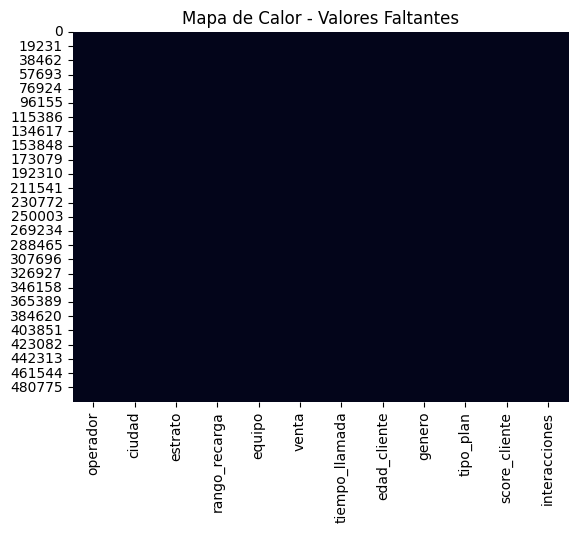

In [13]:
sns.heatmap(
    df.isnull(), cbar=False
)
plt.title('Mapa de Calor - Valores Faltantes')
plt.show()

### Realizaremos graficas para ver el peso de mis variables cualitativas.

In [14]:
def grafic_multi_elements_barplot(fig_value, ax_val_x, ax_val_y, nam_df, lis_cols):
        fig, axes = plt.subplots(ax_val_x, ax_val_y, figsize=fig_value)
        axes = axes.flatten() if ax_val_x > 1 and ax_val_y > 1 else axes

        for i, col in enumerate(lis_cols):
            col_counts = nam_df[col].value_counts()
            sns.barplot(
                x=col_counts.index,
                y=col_counts.values,
                ax=axes[i]
            )
            axes[i].set_ylabel("Amount regsters", fontsize=12)
            axes[i].set_title(f"Amount regsters to {col.capitalize()}", fontsize=14)
            axes[i].tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

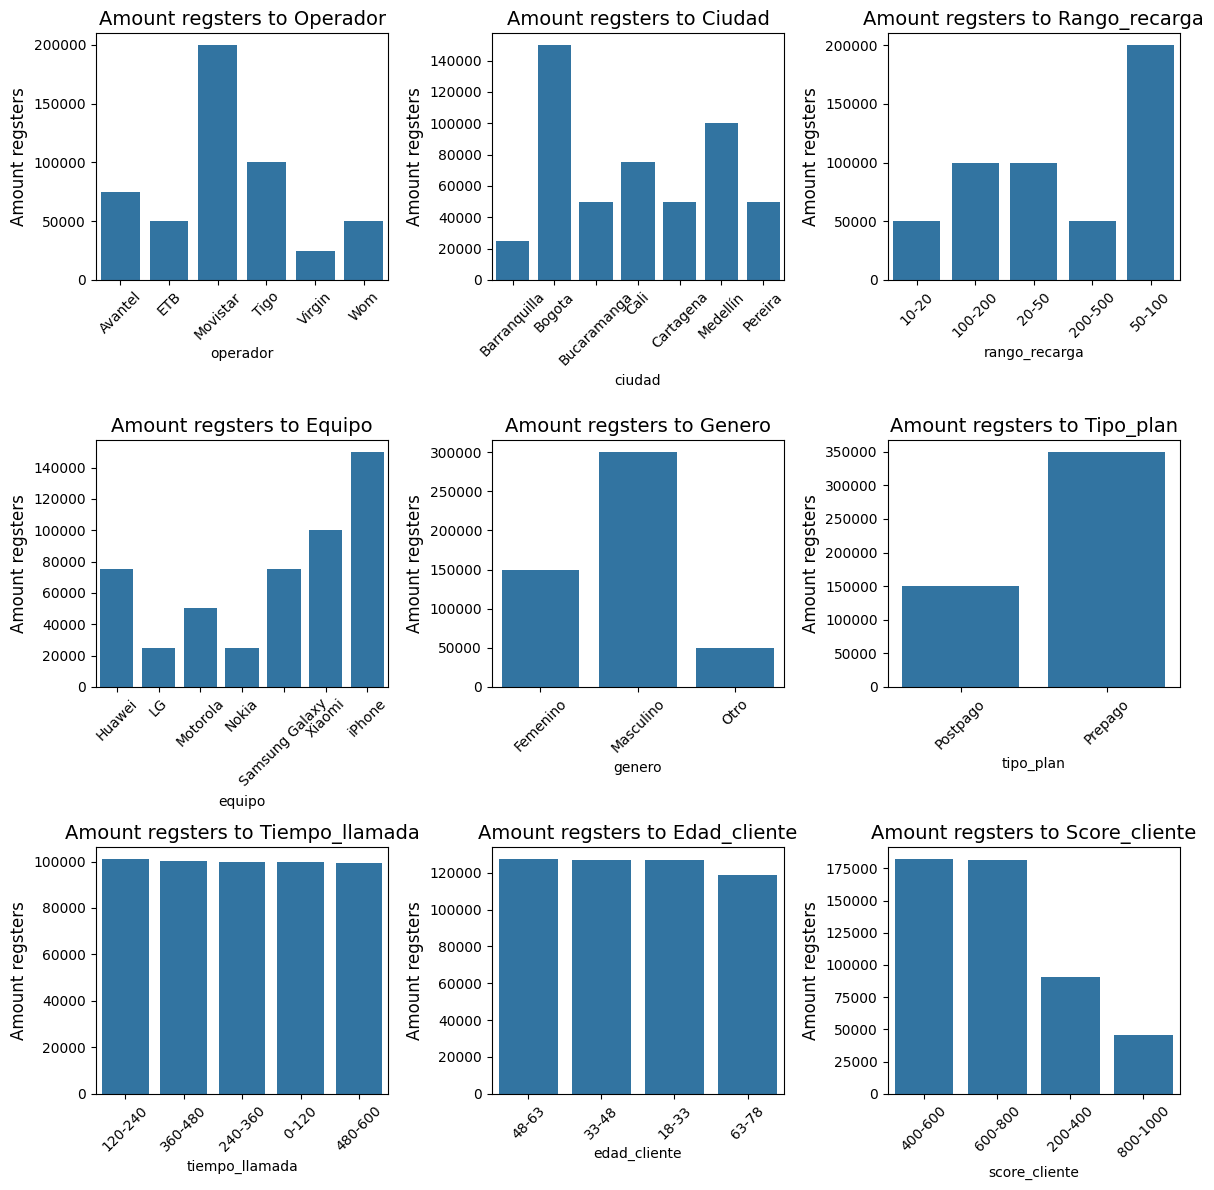

In [15]:
figles = (12, 12)
grafic_multi_elements_barplot(figles, 3, 3, df, var_cualitativas)

### Ahora graficaremos las variables cuantitativas, junto con sus medidas de tendencia central.

[OK] la media para estrato es: 3.4109
[OK] la mediana para estrato es: 3.0
[OK] el coeficiente de variacion para estrato es: 0.4169


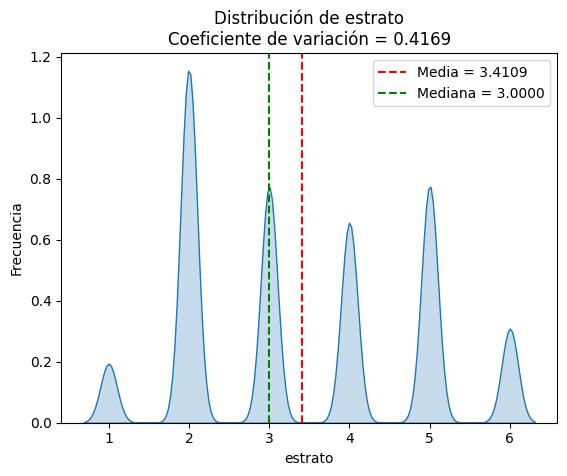


[OK] la media para interacciones es: 15.9947
[OK] la mediana para interacciones es: 16.0
[OK] el coeficiente de variacion para interacciones es: 0.4091


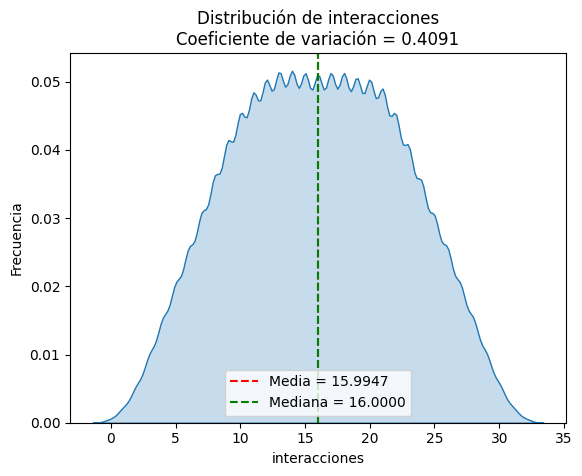

In [16]:
for col in var_cuantitativas:
    
    u = round(df[col].mean(), 4)
    Med = df[col].median()
    cv = round(df[col].std() / u, 4)
    print(f'[OK] la media para {col} es: {u}')
    print(f'[OK] la mediana para {col} es: {Med}')
    print(f'[OK] el coeficiente de variacion para {col} es: {cv}')
    
    sns.kdeplot(
        data=df[col],
        fill=True,
        linewidth=1
    )
    
    plt.axvline(u, color='red', linestyle='--', label=f'Media = {u:.4f}')
    plt.axvline(Med, color='green', linestyle='--', label=f'Mediana = {Med:.4f}')
    
    plt.title(f'Distribución de {col}\nCoeficiente de variación = {cv:.4f}')
    plt.xlabel(f"{col}")
    plt.ylabel("Frecuencia")
    plt.legend()
    plt.show()
    print('')

### Codificamos las variables cualitativas con el metodo OrdinalEncoder

In [17]:
encoder = OrdinalEncoder()

df[var_cualitativas] = encoder.fit_transform(df[var_cualitativas]).astype(int)
df.head(5)

,operador,ciudad,estrato,rango_recarga,equipo,venta,tiempo_llamada,edad_cliente,genero,tipo_plan,score_cliente,interacciones
0,1,1,4,3,0,1,4,2,0,0,1,17
1,3,4,3,2,3,0,4,0,1,1,2,20
2,0,6,3,4,4,0,4,3,1,0,3,11
3,2,6,2,4,6,0,4,3,1,1,2,19
4,1,1,6,4,6,0,2,2,1,0,2,25


### Se mira la correlación de las variables en base a la variable objetivo utilizando el metodo de Pearson

In [18]:
corr_target = round(df.corr(method='pearson')['venta'].sort_values(ascending=False), 4)
corr_target = corr_target.drop('venta')
print(corr_target)
encoder.categories_

tiempo_llamada    0.0013
genero            0.0010
ciudad            0.0008
estrato           0.0008
rango_recarga     0.0002
score_cliente    -0.0009
equipo           -0.0010
edad_cliente     -0.0015
interacciones    -0.0016
operador         -0.0018
tipo_plan        -0.0025
Name: venta, dtype: float64


[array(['Avantel', 'ETB', 'Movistar', 'Tigo', 'Virgin', 'Wom'],
       dtype=object),
 array(['Barranquilla', 'Bogota', 'Bucaramanga', 'Cali', 'Cartagena',
        'Medellín', 'Pereira'], dtype=object),
 array(['10-20', '100-200', '20-50', '200-500', '50-100'], dtype=object),
 array(['Huawei', 'LG', 'Motorola', 'Nokia', 'Samsung Galaxy', 'Xiaomi',
        'iPhone'], dtype=object),
 array(['Femenino', 'Masculino', 'Otro'], dtype=object),
 array(['Postpago', 'Prepago'], dtype=object),
 array(['0-120', '120-240', '240-360', '360-480', '480-600'], dtype=object),
 array(['18-33', '33-48', '48-63', '63-78'], dtype=object),
 array(['200-400', '400-600', '600-800', '800-1000'], dtype=object)]

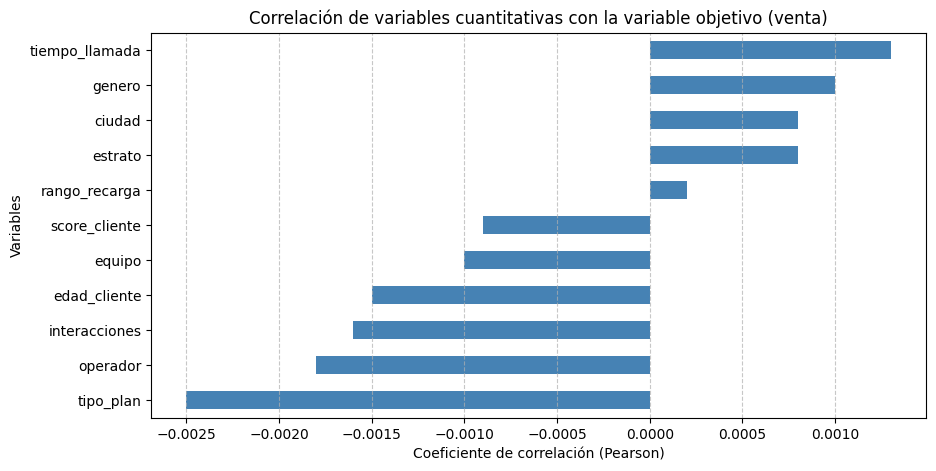

In [19]:
plt.figure(figsize=(10, 5))
corr_target.plot(kind='barh', color='steelblue')
plt.title('Correlación de variables cuantitativas con la variable objetivo (venta)')
plt.xlabel('Coeficiente de correlación (Pearson)')
plt.ylabel('Variables')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Vemos que la correlación de las variables es minima, por lo cual se empleará un modelo NO lineal.

### Posteriormente procedemos con el exporte del DataSet, listo para la implementación en su modelo.

In [20]:
try:
    df.to_csv(dic_args['path_data_out'], sep=',', index=False)
    print('[OK] DataSet exportados con los transformados preparados para el modelo.')
except Exception as err:
    print(f'[ERROR] error al exportar el DataSet: {err}')

[OK] DataSet exportados con los transformados preparados para el modelo.
